<a href="https://colab.research.google.com/github/ShrihariJalihal/DL-Assignments/blob/develop/assignment_230617/Probability_Statistics_Ungraded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Deep Learning
## A program by IISc and TalentSprint
### Assignment: Probability and Statistics

## Learning Objectives

At the end of the experiment, you will be able to

* understand the concepts of covariance, marginal probability
* understand the terms like parameter estimation and bias estimator
* understand the concepts of mean squared error, correlation and maximum likelihood estimation
*   understand the bayesian inference with prior and posterior distributions

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2240589" #@param {type:"string"}

In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886499911" #@param {type:"string"}

In [6]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "Probability_Statistics_Ungraded" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Customer_Churn.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

### Covariance

Covariance is a measure of how much two random variables vary together. It is similar to variance.But variance tells you how a single variable varies and covariance tells you how two variables vary together.

To calculate covariance we can use the formula as follows:

$Cov(x,y) = \frac{\sum (x_{i}-x_{m})(y_{i}-y_{m})}{n-1}$

1. A company has a data set for five-quarters that represents the following:

  a) x = Gross Domestic Product (GDP) growth of each quarter in percent

  b) y = Advancement of the company's latest product in percent

  The five-quarters dataset for x and y is given below:

  x = 2, y = 10

  x = 3, y = 14

  x = 2.7, y = 12

  x = 3.2, y = 15

  x = 4.1, y = 20

  Find the covariance of x and y using the above dataset?

In [8]:
# Declaring the parameters x and y of the dataset to find the covariance
x = [2,3,2.7,3.2,4.1]
y = [10,14,12,15,20]

# Covariance of x and y using cov()
print("Variance of x:",np.cov(x))
print("Variance of y:",np.cov(y))
print("Covariance of x and y:\n",np.cov(x,y))

Variance of x: 0.5849999999999997
Variance of y: 14.2
Covariance of x and y:
 [[ 0.585  2.85 ]
 [ 2.85  14.2  ]]


A positive value of covariance shows that new product's growth has a positive relationship with quaterly GDP growth.

### Marginal Probability

The probability of an event that occurs irrespective of the outcome of another event is known as Marginal probability. It is used in the scenarios where we are interested in calculating the probability of an event for a random variable not taking into account the outcome of another random variable.

For example, the probability of $X = E_{A}$ for total outcomes of Y.

We can calculate the Marginal Probability as follows:

$P(X=A) = \sum  P(X=A, Y=y_{i})$ for all y.

This denotes that for a given fixed event $A$, the marginal probability is simply the sum or union of all the probability of all events for the second variable $y$.


1. There are three bags colored "**black**" "**white**" and "**grey**"containing "**green**" and "**orange**" balls in all three of them. The black bag contains 4 orange and 12 green balls. Next, the white bag contains 18 green and 6 orange balls. Further, the grey bag contains 8 orange and 24 green balls. Consider that the probability of picking up the balls from black, white, grey bag are 0.36, 0.28 and 0.44 respectively and you attempted 100 trials. Find the probability (Marginal Probability) of picking up an orange ball.

  **Explanation**: The given probability of picking up the balls from the bags are 0.36, 0.28, and 0.44. This means that out of 100 trials, the number of times we will pick the balls from black, white, and grey bags are 36, 28, and 44.

In [9]:
# Number of orange and green balls in black bag
o_black = 4
g_black = 12

# Number of orange and green balls in white bag
o_white = 6
g_white = 18

# Number of orange and green balls in grey bag
o_grey = 8
g_grey = 24

In [10]:
# Given probabilities of picking up the ball from black, white, and grey bags
trials = 100
p_black = 0.36
p_white = 0.28
p_grey = 0.44

# Out of 100 trials, the number of instances where a ball is picked from black, white and grey bags
n_black = p_black*trials
n_white = p_white*trials
n_grey = p_grey*trials

print(n_black)
print(n_white)
print(n_grey)

36.0
28.000000000000004
44.0


Next, as we want to find the probability of picking up an orange ball, we will first calculate the number of instances where we picked an orange ball from black, white, and grey bags.

In [11]:
ib_orange =  (o_black/(o_black+g_black))*n_black
iw_orange = (o_white/(o_white+g_white))*n_white
ig_orange = (o_grey/(o_grey+g_grey))*n_grey

i_total = ib_orange + iw_orange + ig_orange

print("No. of instances where we pick orange ball from black bag\n",ib_orange)
print("No. of instances where we pick orange ball from white bag\n",iw_orange)
print("No. of instances where we pick orange ball from grey bag\n",ig_orange)
print("Total instances where we pick orange ball\n" ,i_total)

No. of instances where we pick orange ball from black bag
 9.0
No. of instances where we pick orange ball from white bag
 7.000000000000001
No. of instances where we pick orange ball from grey bag
 11.0
Total instances where we pick orange ball
 27.0


Now, the probability of picking up an orange ball is the sum of probabilities of all the instances where an orange ball is driven out from the bag over the total number of trials.

In [12]:
marginal_probability = i_total/trials
print(marginal_probability)

0.27


### Customer churn dataset

#### About Data

This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".

The dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

1. "state", string: 2-letter code of the US state of customer residence
2. "account_length", numerical: Number of months the customer has been with the current telecom provider
3. "area_code", string : "area_code_AAA" where AAA = 3 digit area code.
4. "international_plan", (yes/no): The customer has international plan.
5. "voice_mail_plan", (yes/no): The customer has voice mail plan.
6. "number_vmail_messages", numerical: Number of voice-mail messages.
7. "total_day_minutes", numerical: Total minutes of day calls.
8. "total_day_calls", numerical: Total minutes of day calls.
9. "total_day_charge", numerical: Total charge of day calls.
10. "total_eve_minutes", numerical: Total minutes of evening calls.
11. "total_eve_calls", numerical: Total number of evening calls.
12. "total_eve_charge", numerical: Total charge of evening calls.
13. "total_night_minutes", numerical: Total minutes of night calls.
14. "total_night_calls", numerical: Total number of night calls.
15. "total_night_charge", numerical: Total charge of night calls.
16. "total_intl_minutes", numerical: Total minutes of international calls.
17. "total_intl_calls", numerical: Total number of international calls.
18. "total_intl_charge", numerical: Total charge of international calls
19. "number_customer_service_calls", numerical: Number of calls to customer service
20. "churn", (yes/no): Customer churn - target variable.

#### Loading the data

In [13]:
customer_churn = pd.read_csv('Customer_Churn.csv')

In [14]:
customer_churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


#### Basic data preprocessing

In [15]:
# Replacing 'yes' and 'no' values with '1' and '0'.
customer_churn['churn'].replace(['yes', 'no'], [1, 0], inplace=True)

Let us have a look at the columns after replacing churn values with '1' and '0'.

In [16]:
customer_churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


Numerical Features

In [17]:
numerical= customer_churn.select_dtypes(include = 'number').columns

categorical = customer_churn.select_dtypes(include = 'object').columns

print(f'Numerical Columns:  {customer_churn[numerical].columns}')
print('\n')
print(f'Categorical Columns: {customer_churn[categorical].columns}')

Numerical Columns:  Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


Categorical Columns: Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')


For ease of usage, we got the list of the numerical and categorical features.

In [18]:
num_col = []

# Checking for the numnerical columns
for col in numerical:
    if customer_churn[col].dtype == "int64":
        num_col.append(col)

num_col.remove("churn")
print(num_col)

['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls']


In [19]:
# Convert all types columns (except for churn) with int64 into float type.
for i in num_col:
  customer_churn[i] = customer_churn[i].astype(float)

**Correlation**

The correlation is a statistical measure of the strength of the relationship between the relative movements of two variables. We use correlation coefficient to measure the strength of relationship. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

**Note:** The correlation we are referring here is Pearson correlation.

Some key points related to correlation are:

1. Correlation has no units.
2. A key mathematical property of the Pearson correlation coefficient is that it is invariant under separate changes in location and scale in the two variables. That is, we may transform $X$ to $a + bX$ and transform $Y$ to $c + dY$, where $a, b, c$ and $d$ are constants with $b, d > 0$, without changing the correlation coefficient.
An important limitation of the correlation coefficient is that it assumes a linear association.
3. Correlation between two random variables, $\rho (X,Y)$ is the covariance of the two variables normalized by the variance of each variable. This normalization cancels the units out and normalizes the measure so that it is always in the range [0, 1]:

  $\rho (X, Y) = \frac{Cov(X, Y)}{\sqrt{(Var(X)Var(Y))}}$

**Example** : Correlation statistics can be used in finance and investing. A correlation coefficient could be calculated to determine the level of correlation between the price of crude oil and the stock price of an oil-producing company, such as Exxon Mobil Corporation. Since oil companies earn greater profits as oil prices rise, the correlation between the two variables is highly positive.


2. Find the features in the customer churn dataset which has the highest correlation.

In [20]:
# Function for correlation plot
def correlation_plot():
  plt.figure(figsize=(12, 6))
  sns.heatmap(customer_churn[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm');

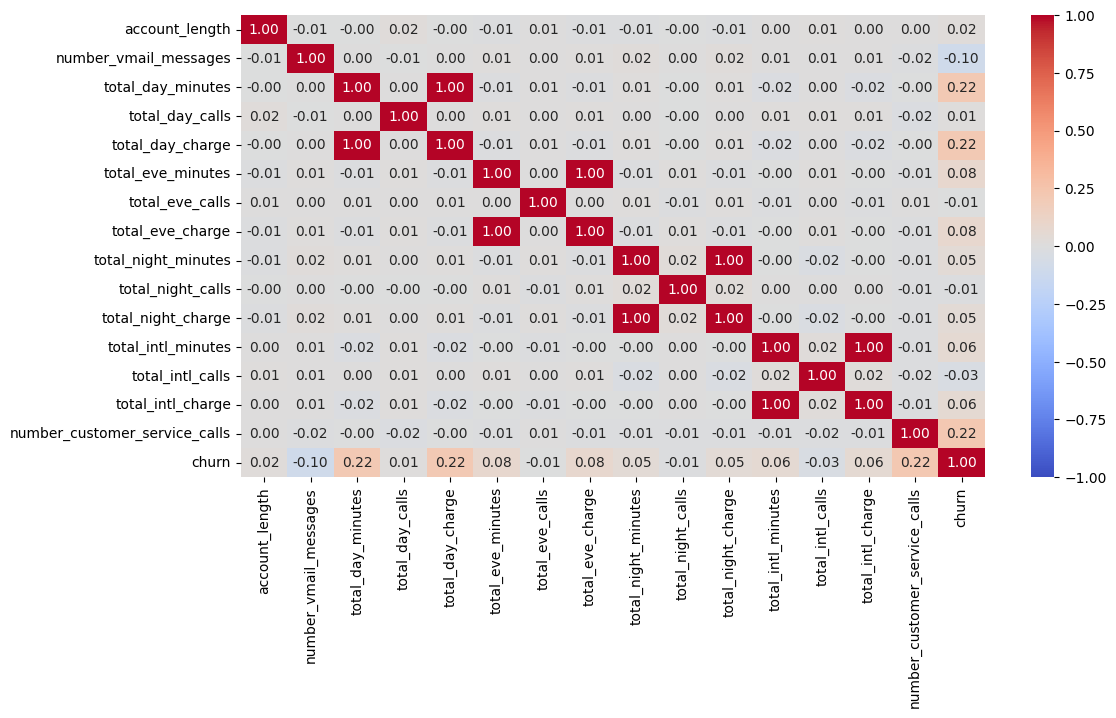

In [21]:
correlation_plot()

* We can see in heatmap that we have some multicollinerity.
* We need to drop one of each highly correleated column pairs.

In [22]:
# Dropping the columns
drop_col = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
customer_churn = customer_churn.drop(drop_col, axis=1)
customer_churn.shape

(4250, 16)

In [23]:
# Selecting the numerical columns
numerical = customer_churn.select_dtypes(include = 'number').columns
print(numerical)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls', 'churn'],
      dtype='object')


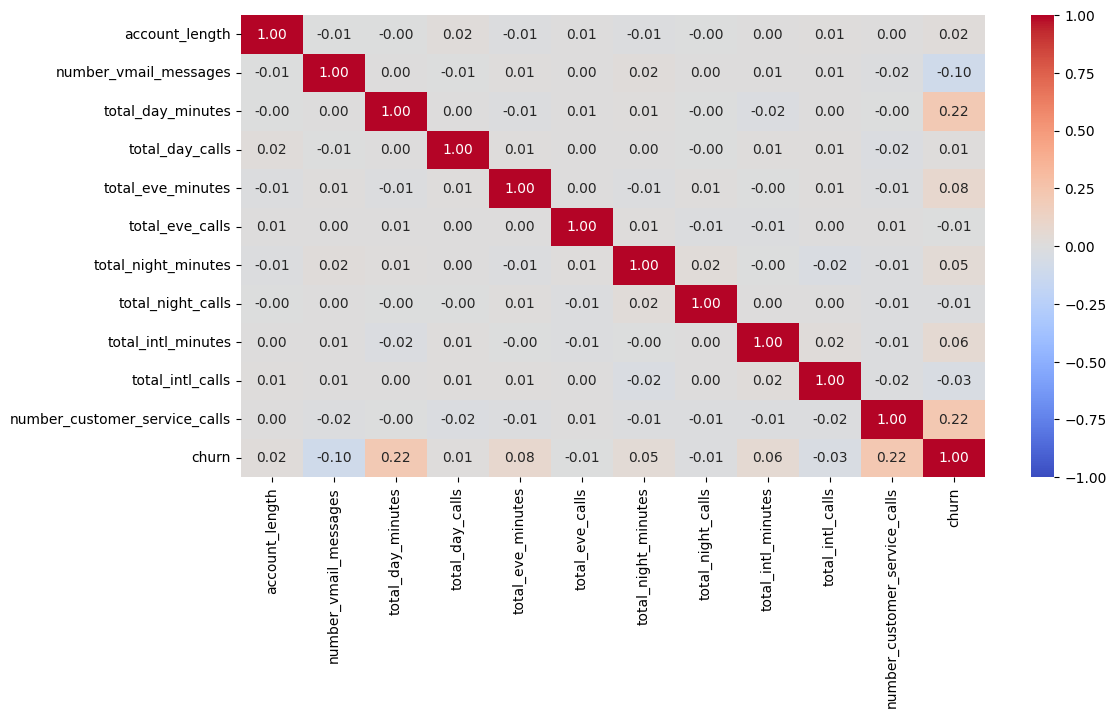

In [24]:
correlation_plot()

Now, We got rid of multicollinear columns. Here, we can see that `total_day_minutes` has the highest correleation with `churn`.Overall, there is low correleations among features.


**Standard Deviation**



3. Find the standard deviation of the feature which is highly correlated with `churn` in the dataset.

In [25]:
np.std(customer_churn['total_day_minutes'])

54.00601856072318

4. Calculate the variance of the feature which has the second highest correlation with churn.


In [26]:
customer_churn.total_eve_minutes.var()

2525.0140777035426

`Consider another data of employees salaries, number of working hours, and experience in years and answer the below question.`

`dataframe = (`

`  {'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],`

  `'Salary':[50000, 54000, 50000, 189000, 55000, 40000, 59000],`

  `'Hours':[41,40,36,17,35,39,40],`

  `'Experience(In Years)':[2, 2, 3, 7, 5, 2, 4]})`






5. Calculate the correlation between Salary and Experience(In Years) columns for the employees data given above.


In [27]:
# Create a dataframe
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000, 54000, 50000, 189000, 55000, 40000, 59000],
                   'Hours':[41, 40, 36, 17, 35, 39, 40],
                   'Experience(In Years)':[2, 2, 3, 7, 5, 2, 4]})

In [28]:
# Calculate the correlation between Salary and Experience(In Years)
print(df['Experience(In Years)'].corr(df['Salary']))

0.8314219298762264


6. Find the quartile thresholds for the weekly hours worked by the employees for the above employees data.

In [29]:
print("The quartile threshold values are\n", df['Hours'].quantile([0.25, 0.5, 0.75]))

The quartile threshold values are
 0.25    35.5
0.50    39.0
0.75    40.0
Name: Hours, dtype: float64


### Parameter Estimation

**Parameter Estimation:** Parameters are defined as the characteristics of the given data. Estimators are defined as the predictions of values with the help of the dataset.

Any function of a random sample that is used to estimate the values of the parameter of a given dataset is called Parameter Estimation.

If $x_1,x_2,x_3,....x_n$ is the sample size of size n, then

$T_n(x_1,x_2,x_3,....x_n)$ will be the estimator of parameter.

### Bias Estimation

**Bias Estimation:**  Bias is a term that refers to any type of error or distortion that is found with the use of analysis. Bias Estimation is the difference between the parameter to be estimated and the mathematical expectation of the estimator.

$bias(\hatθ_n)$ = $E[\hatθ_n]- \hatθ_n$

The estimator is said to be unbiased when expected parameter and the original parameter are same i.e $E[θ_n^|] = θ_n^|.$

`7.` `Calculate the bias for the below given dataframe.`


  `dataframe = {`

  `'Expected_parameter':[2,3,1,5,6,7,8,9,6,5,4,3,2],`

  `'Original_parameter':[3,4,3,2,2,4,5,6,9,6,6,4,5]`
`}`




In [30]:
data = {
    'Expected_parameter':[2,3,1,5,6,7,8,9,6,5,4,3,2],
    'Original_parameter':[3,4,3,2,2,4,5,6,9,6,6,4,5]
}

In [31]:
dataframe = pd.DataFrame(data)
dataframe['Bias'] = dataframe['Expected_parameter'] - dataframe["Original_parameter"] # Calculating the bias according to the formula
print("The bias is\n", dataframe["Bias"])

The bias is
 0    -1
1    -1
2    -2
3     3
4     4
5     3
6     3
7     3
8    -3
9    -1
10   -2
11   -1
12   -3
Name: Bias, dtype: int64


### Mean Squared Error

**Mean Squared Error :**


Let $\hat{X}=g(Y)$ be an estimator of the random variable $X$, given that we have observed the random variable $Y$. The mean squared error (MSE) of this estimator is defined as

$E[(X−\hat{X})^2]=E[(X−g(Y))^2].$


8. Consider two estimators $E_{1}$  and $E_{2}$ used by two different Machine Learning algorithms.These estimators are used to predict the values using the dataset. If the true values present in the dataset for the predictor variable are [ 1, 1, 2, 2, 4 ] and the values predicted by the two estimators are: $E_{1}$ = [ 0.6, 1.29, 1.99, 2.69, 3.4 ], and $E_{2}$ = [0.45, 1.19 ,1.99 ,1.69, 2.4]. Find out which estimator gives better estimate for prediction.

In [32]:
# Defining Y_true and Y_pred values
Y_true = [1,1,2,2,4]
E1_pred = [0.6,1.29,1.99,2.69,3.4]
E2_pred = [0.45, 1.19 ,1.99 ,1.69, 2.4]

# Calculating Mean Squared Error
MSE1 = np.square(np.subtract(Y_true,E1_pred)).mean()
MSE2 = np.square(np.subtract(Y_true,E2_pred)).mean()

print("The mean Square Error for Estimator 1 is ",MSE1)
print("The mean Square Error for Estimator 2 is ",MSE2)

The mean Square Error for Estimator 1 is  0.21606
The mean Square Error for Estimator 2 is  0.5989600000000002


### Maximum Likelihood Estimation

**Maximum Likelihood Estimation:** Maximum likelihood estimation is a method that determines maximum values for the parameter of a model.

9. Build 1000 data points from the normal distribution with  mean = 1 and standard deviation = 5. Estimate their maximum likelihood of mean, variance, and standard deviation from the data.

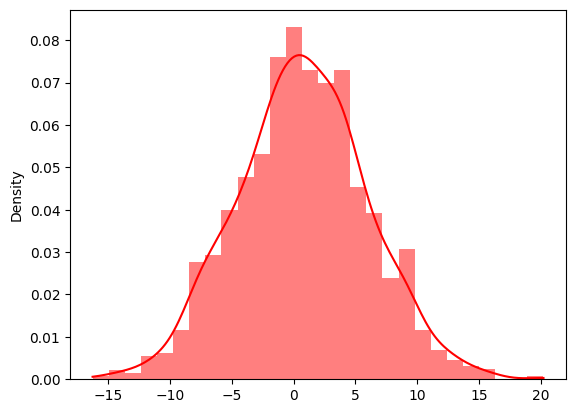

In [33]:
# Building the distributed data from mean and standard deviation
mean = 1
std = 5
N_points = 1000

#  Finding the random normal distributed data
data = np.random.normal(mean, std, N_points)
sns.histplot(data, kde=True, color="red", stat="density", linewidth=0);

In [34]:
# Printing the original mean and variance
print('Original mean is '+str(mean) + ', variance is ' + str(std**2)," and standard deviation is " +str(std))

Original mean is 1, variance is 25  and standard deviation is 5


In [35]:
# Calculating the mean from the data
mu_ML = 1/N_points * sum(data)
print('Maximum likelihood estimation of mean from the normal distributed data is '+str(mu_ML))

Maximum likelihood estimation of mean from the normal distributed data is 0.7389209162707785


In [36]:
# Calculating the variance from the data
var_ML = (1/(N_points-1)) * sum([(x-mu_ML) ** 2 for x in data])
print('Maximum likelihood estimation of variance from the normal distributed data is ' + str(var_ML))

Maximum likelihood estimation of variance from the normal distributed data is 27.468910250684317


In [37]:
# Calculating the standard deviation from the data
std_ML = math.sqrt(var_ML)
print("Maximum likelihood estimation of standard deviation from the normal distributed data is  "+str(std_ML))

Maximum likelihood estimation of standard deviation from the normal distributed data is  5.241079111278928


### Bayesian inference

**Bayesian inference :**- Bayesian inference is a method of statistical inference in which Baye's theorem is used to update the probability for a hypothesis as more evidence or information becomes available. Bayesian inference is an important technique in statistics, and especially in mathematical statistics.

The core of Bayesian Inference is to combine two different distributions (likelihood and prior) into one “smarter” distribution (posterior). Posterior is **“smarter” in the sense that the classic maximum likelihood estimation (MLE) doesn’t take into account a prior**. Once we calculate the posterior, we use it to find the “best” parameters and the **“best” is in terms of maximizing the posterior probability**, given the data. This process is called Maximum A Posteriori (MAP).

Bayesian Inference has three steps.

Step 1. **[Prior] Choose a PDF to model your parameter θ**, aka the prior distribution **P(θ)**. This is **your best guess** about parameters **before** seeing the data **X**.

Step 2. **[Likelihood] Choose a PDF for $P(X|θ)$**. Basically you are modeling how the data **$X$** will look like given the parameter **$θ$**.

Step 3. **[Posterior] Calculate the posterior** distribution **$P(θ|X)$** and pick the **$θ$ that has the highest $P(θ|X)$**.

And the posterior becomes the new prior. Repeat step 3 as you get more data.


**Formula for calculating Posterior**

$P(θ|X) = \frac{P(X|θ).P(θ)}{\int P(X|θ).P(θ).dθ}$

where, $P(θ|X)$ = Posterior, $P(X|θ)$ = Sampling, $P(θ)$ = Prior, $dθ$ = Normalizing constant

**Note**: We will follow these steps to work on 11th question.

10. Bob is selecting one marble from two bowls of marbles. The first bowl has 75 red marbles and 25 blue marbles. The second bowl has 50 red marbles and 50 blue marbles. Given that Bob is equally likely to choose from either bowl and does not discriminate between the marbles themselves, Bob in fact chooses a red marble. What is the probability Bob picked the marble from bowl 1 and bowl 2?

In [38]:
# Probability of fetching the marble from bowl
P_H_1 = P_H_2 = 0.5

# Probability of fetching the red marble from first bowl
P_E_H_1 = 75/100

# Probability of fetching the marble from second bowl
P_E_H_2 = 50/100

# Applying the Bayesian formula to pick the red marble from first bowl
P_H_1_E = (P_E_H_1*P_H_1)/((P_E_H_1*P_H_1)+(P_E_H_2*P_H_2))
P_H_2_E = (P_E_H_2*P_H_2)/((P_E_H_1*P_H_1)+(P_E_H_2*P_H_2))
print("The probability of fetching the red marble from bowl 1 is "+str(P_H_1_E)+ " and from bowl 2 is "+str(P_H_2_E))

The probability of fetching the red marble from bowl 1 is 0.6 and from bowl 2 is 0.4


### Prior and Posterior distribution

**Prior distribution:**
A Prior distribution represents your belief about the true or false value of a parameter. It shows your “best guess.”

**Posterior distribution:**  The posterior distribution summarizes what you know after the data has been observed. The summary of the evidence from the new observations is the likelihood function.
It is represented as $Posterior$ $Distribution$ $=$ $Prior$ $Distribution * Likelihood$ $Function (“new$ $evidence”)$

11. Consider a scenario, where, an education management company conducts free sessions on YouTube on various topics related to Deep Learning. Everytime a session is conducted, around 4000 people actively attends it. After the experts closes the session, a feedback is asked from the attendees. Some people liked the session and some don't. Now, we would like to make predictions about what percentage of people will engage and like when we conduct a session in the future, so that the company can understand about the potential participants willing to continue learning by enrolling in their professional courses.



Let's generate the data X.

In [39]:
np.set_printoptions(threshold=100)

# Generating 4,000 participants reponse.
# Assuming the 'likes' or 'dislikes' follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means liked. 0 means dislike.

# We pick the success rate of 30%.
liked_prob = 0.3

# IID (independent and identically distributed) assumption
liked_data = np.random.binomial(n=1, p=liked_prob, size=4000)

Let us have a look at liked data.

In [40]:
print(liked_data)

[1 1 0 ... 0 1 0]


In [41]:
len(liked_data)

4000

Firstly, we will choose the PDF to model the parameter $\theta$.

Note : $\theta$ is the **'liking'** probability.


`i) What kind of probability distributions should we use to model a probability?`

**Explaination**: Since, we have only one thing to predict, we will use a Beta distribution. It has two parameters, $α$ & $β$, that we need to decide. You can think of $α$ as How many people liked (the number of successes) and $β$ as how many people did’t liked (the number of failures). These parameters — how big or small $α$ & $β$ are — will determine the shape of the distribution.

`ii) Let us assume that we have 800 people out of 4000 who liked the session. Write this in terms of beta distribution and plot the prior distribution with respect to all` $\theta$ `values`.

In [42]:
# Declaring alpha and beta
alpha = 800
beta = 4000 - alpha

# domain θ
theta_range = np.linspace(0, 1, 2000)

# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=alpha, b=beta)

Plotting the distribution

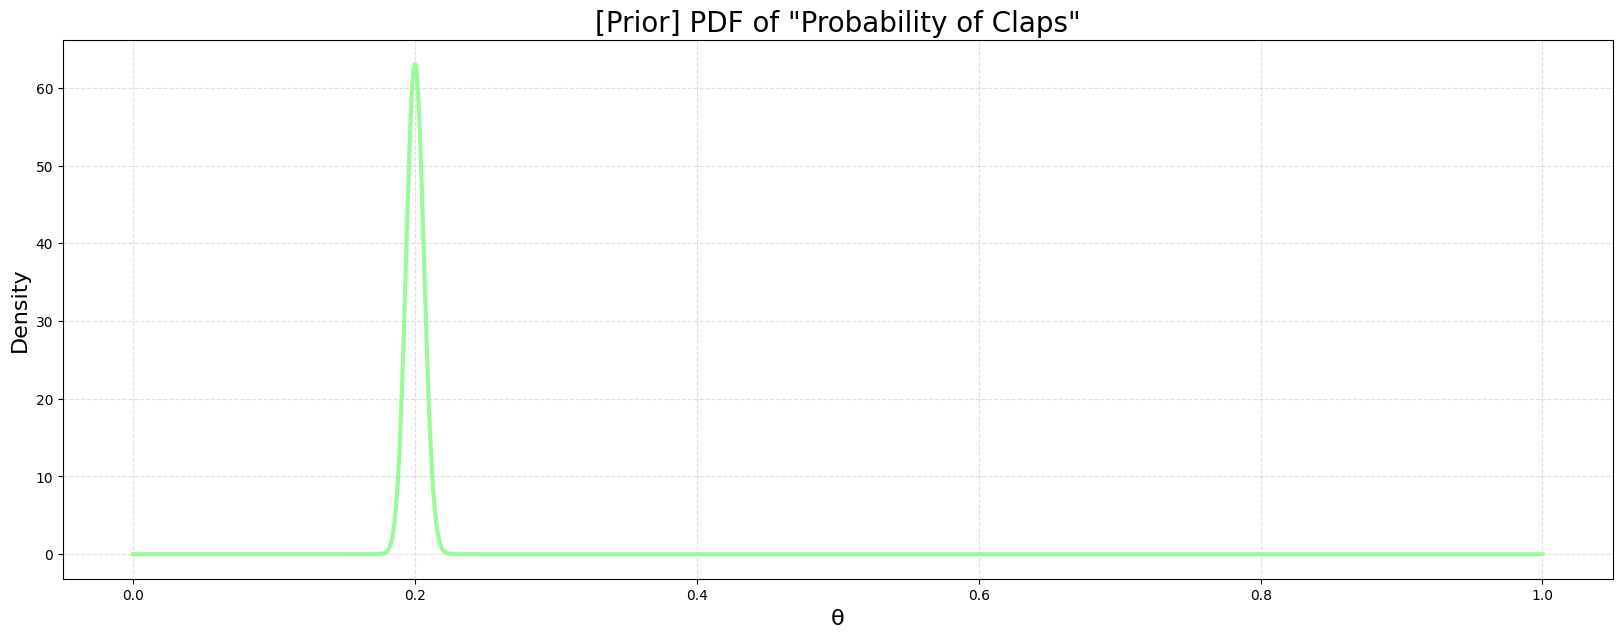

In [43]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')

# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)

# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()

We can observe from the above plot that it spikes at 20% (800 likes / 4000 participants) as expected.

Further, lets get into step 2 which is Likelihood $P(X|θ)$.

Choose a probability model for $P(X|θ)$, the probability of seeing the data $X$ given a particular parameter $θ$. We can also call Likelihood as a sampling distribution.

`iii) Find out which probability distribution should be used to model the sampling distribution and the likelihood?`




**Hint:** Since $X$ is binary, and we also have the total number of participants $(n)$ and we want the probability of liked $(p)$. So, we can use Binomial Distribution with $n$ and $p$.

In [44]:
# The sampling dist P(X|θ) with a prior θ
likelihood = stats.binom.pmf(k = np.sum(liked_data), n = len(liked_data), p = alpha/(alpha+beta))
print(likelihood)

8.79859309064201e-43


`iv)` `Plot the graph for` $P(X|θ)$ `for all possible` $θ$.












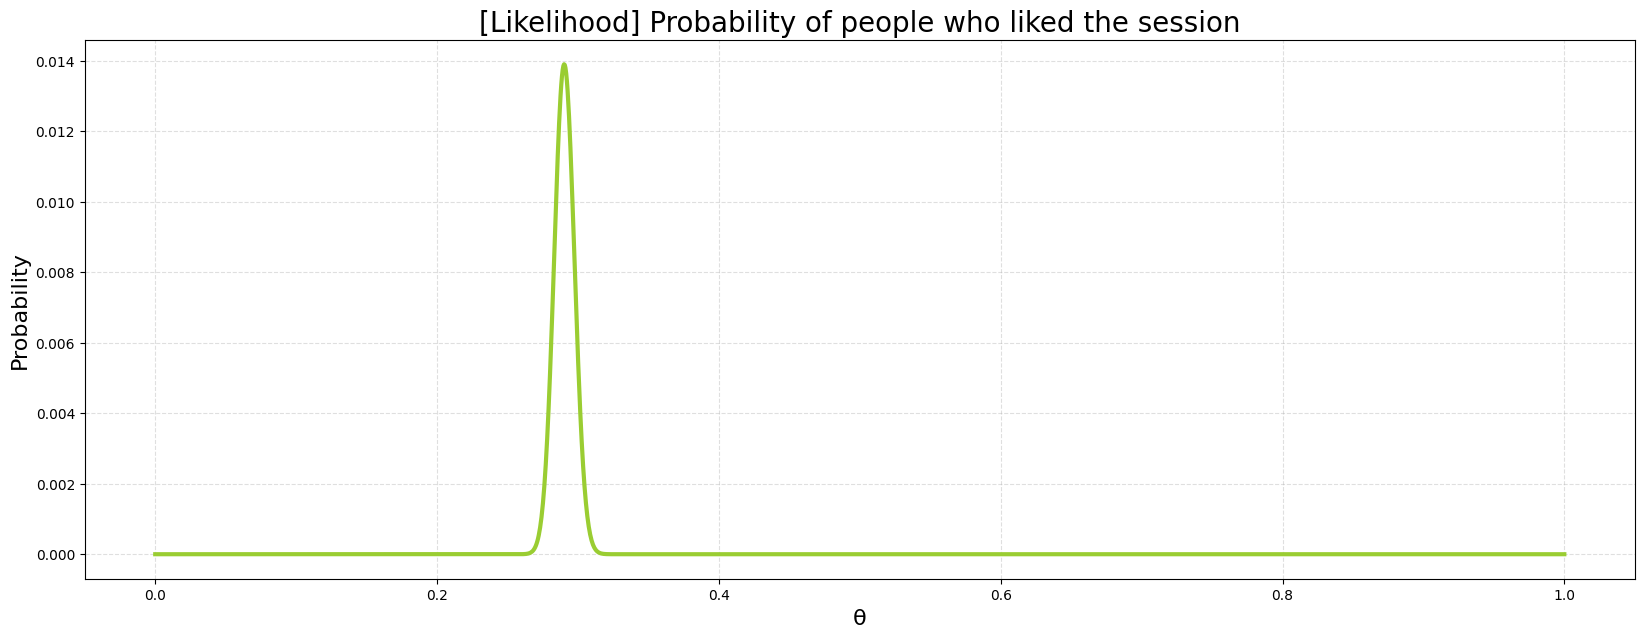

In [45]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(liked_data), n = len(liked_data), p = theta_range)

# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')

# Add a title
plt.title('[Likelihood] Probability of people who liked the session' , fontsize=20)

# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()

Now, we will try to calculate the posterior distribution.

Even though there are thousands of data points, we can convert them into a single scalar — the likelihood **$P(X|θ)$ — by plugging data into the model that you choose** (in this example, the binomial distribution).

Then, we calculate **$P(θ)$ & $P(X|θ)$** for a specific **$θ$** and multiply them together. If you do this for every possible **$θ$**, you can pick the highest **$P(θ)$ * $P(X|θ)$** among different **$θ’s$**.

Your initial guess about parameters was **$P(θ)$**. Now you are **upgrading a simple $P(θ)$ into something more informative — $P(θ|X)$ — as more data become available.**
**$P(θ|X)$** is still the probability of **$θ$**, just like **$P(θ)$** is. However, **$P(θ|X)$** is a smarter version of **$P(θ)$**.

`v). Calculate the Posterior Distribution` $P(θ|X)$?

In [46]:
# Finding the Prior
theta_range_e = theta_range + 0.001
prior = stats.beta.cdf(x = theta_range_e, a=alpha, b=beta) - stats.beta.cdf(x = theta_range, a=alpha, b=beta)
# prior = stats.beta.pdf(x = theta_range, a=alpha, b=beta)

# Finding likelihood
likelihood = stats.binom.pmf(k = np.sum(liked_data), n = len(liked_data), p = theta_range)

# Element-wise multiplication
posterior = likelihood * prior
normalized_posterior = posterior / np.sum(posterior)

**Note:** We calculated the prior by subtracting two `stats.beta.cdf` instead of using `stats.beta.pdf` because the likelihood `stats.binom.pmf` is a probability while `stats.beta.pdf` returns a density. Even if we use the density to calculate the posterior, it won’t change the optimization result. However, if you want the units to match, converting a density into a probability is necessary.

`vi). Plot the graph for Prior, Likelihood, and Posterior together.`

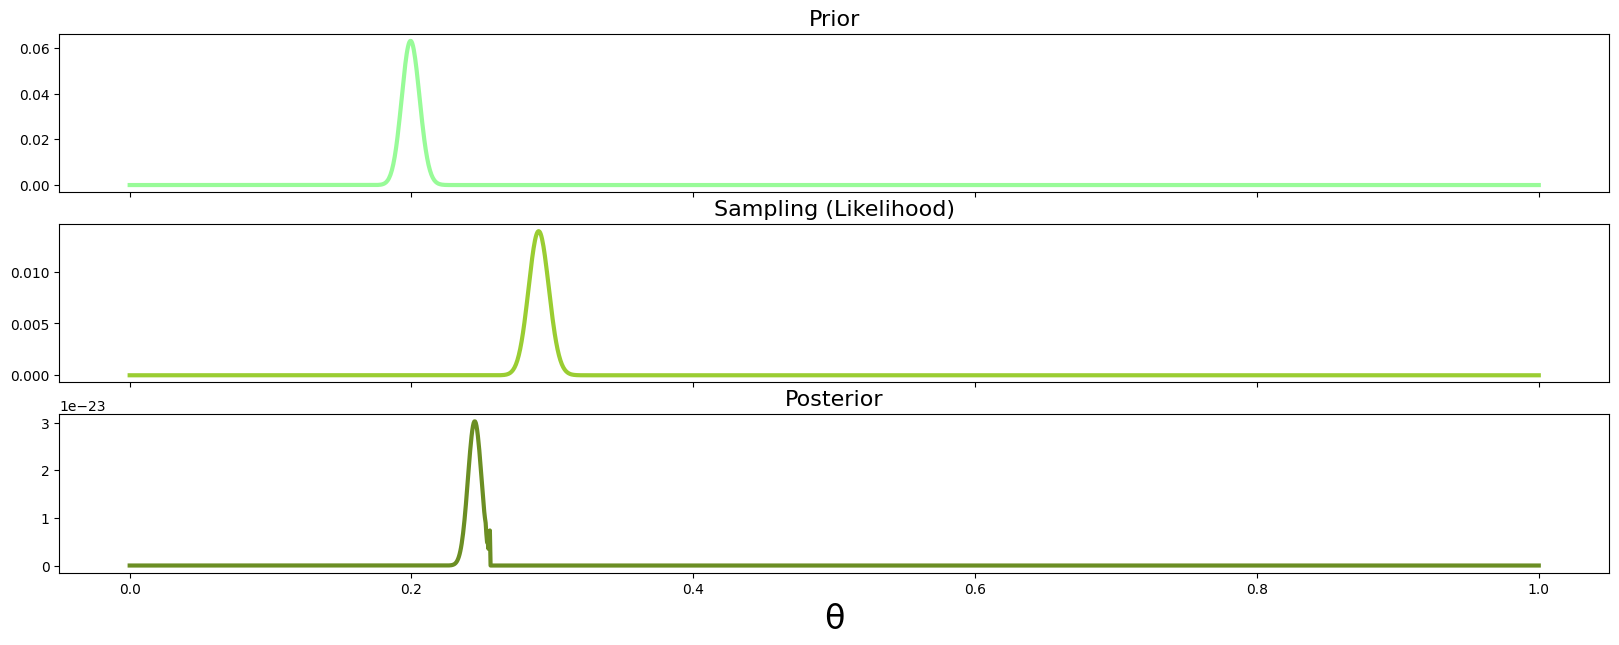

In [47]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

When you look at the posterior graph (the 3rd one), **notice it is where the likelihood shifted toward the prior**. The **liked** probability for the prior was 20%. The **liked** probability for the data was given as 30%. Now, the posterior has its peak around 0.25%.

Also, notice the width of the bell curves in prior/likelihood has shrunk in the posterior. Because we incorporated more information through sampling, the range of possible parameters is now narrower.

The more data you gather, the graph of the posterior will look more like that of the likelihood and less like that of the prior. In other words, as you get more data, the original prior distribution matters less.

Finally, we can pick **$\theta$ that gives the highest posterior** computed by numerical optimization, such as the Gradient Descent or newton method. This whole iterative procedure is called **Maximum A Posteriori estimation (MAP)**.

12. Construct a prior and posterior distribution with some binominal random distribution techniques.

In [48]:
def bern_post(n_params=1000, n_sample=1000, true_p=.5, prior_p=.5, n_prior=1000):
    # Creating the samples
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)

    # Calculating the Likelihood
    likelihood = np.array([np.product(stats.bernoulli.pmf(sample, p)) for p in params])
    likelihood = likelihood / np.sum(likelihood)

    # Prior sample
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(stats.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)

    # Finding the posterior
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)

    # Plotting the graph
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()

    return posterior

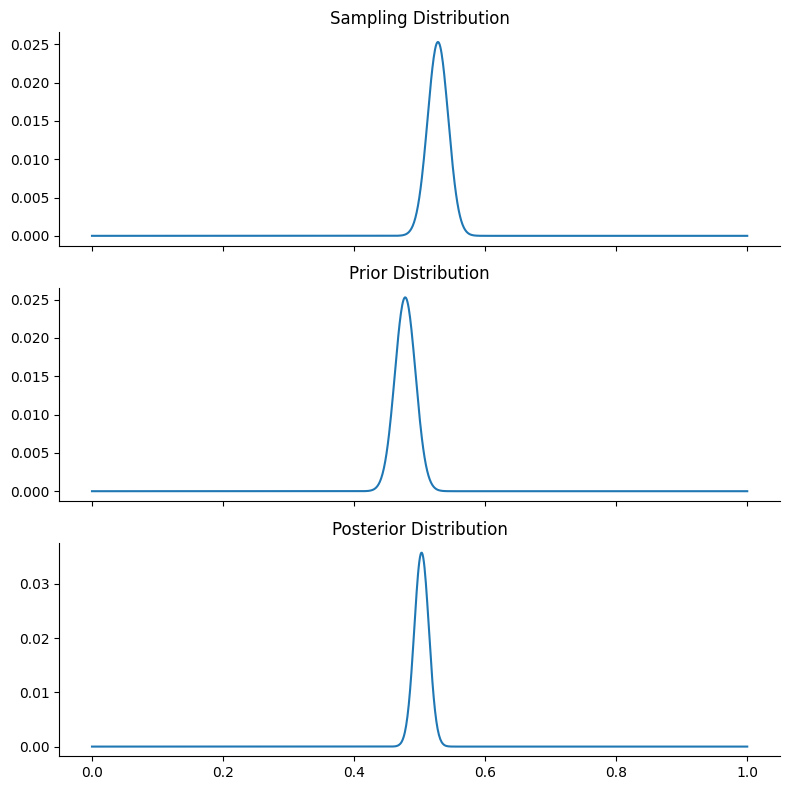

In [49]:
moredata_post = bern_post(n_sample=1000)